## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview

combined_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.

len(combined_mouse_data["Mouse ID"])

1893

In [4]:
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse = combined_mouse_data[["Mouse ID","Timepoint"]].value_counts()

# duplicate_mice = dup_mouse["Mouse ID"].duplicated(keep="last")
# print(duplicate_mice)



In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# combined_mouse_data = combined_mouse_data.drop_duplicates(subset=["Mouse ID"],keep="first")
clean_df = combined_mouse_data.drop_duplicates("Mouse ID")

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.

len(combined_mouse_data["Mouse ID"])

1893

## Summary Statistics

In [8]:
mean = combined_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Calculating summary statististics

mean = combined_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = combined_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = combined_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_deviation = combined_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM = combined_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Creating data data frame with all above calculations
summary_stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": SEM})
summary_stats_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

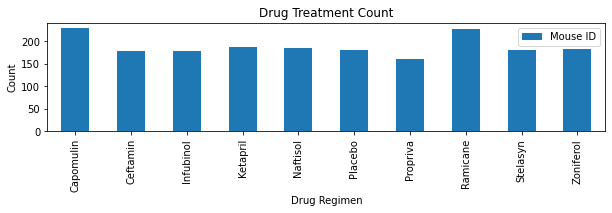

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Regimen_data = pd.DataFrame(combined_mouse_data.groupby(["Drug Regimen"]).count()).reset_index()

#Alter the dataframe down to two columns
Regimen_df = Regimen_data[["Drug Regimen", "Mouse ID"]]
Regimen_df = Regimen_df.set_index("Drug Regimen")

# Plotting graph

Regimen_df.plot(kind="bar", figsize=(10,2))

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Count')

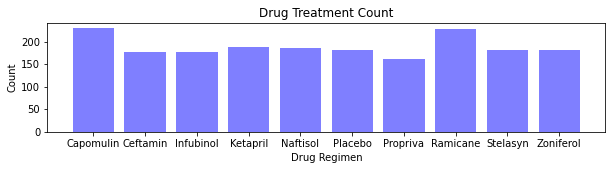

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

Regimen_list = summary_stats_df.index.tolist()


 #Turn drug_count into a list
drug_count = (combined_mouse_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()


x_values = np.arange(len(drug_count))

# Assigning values for the x-axis

x_values = Regimen_list


#Creating and customizing bar chart
plt.figure(figsize=(10,2))
plt.bar(x_values, drug_count, color='b', alpha= 0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(combined_mouse_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [13]:
 #Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

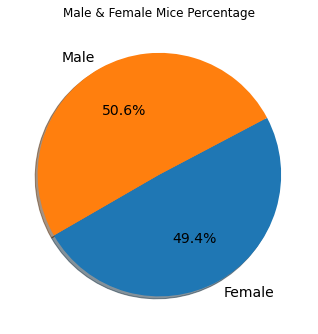

In [14]:
# Plotting pie chart

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=210, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

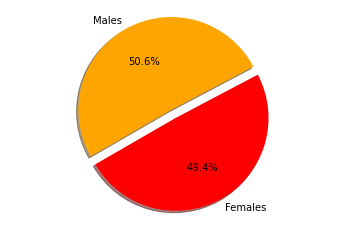

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender_count = (combined_mouse_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Females", "Males"]
colors = ["red", "orange"]
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=210)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_mouse_data.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

sorted_df = combined_mouse_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [20]:
#Grab data from "Capomulin" and reset index
capo_df = last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [21]:
#Make column "Tumor Volume (mm3)" a dataframe object

capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


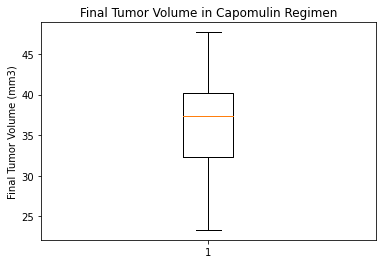

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combined_mouse_data.loc[combined_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
# Grab data from one mouse
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


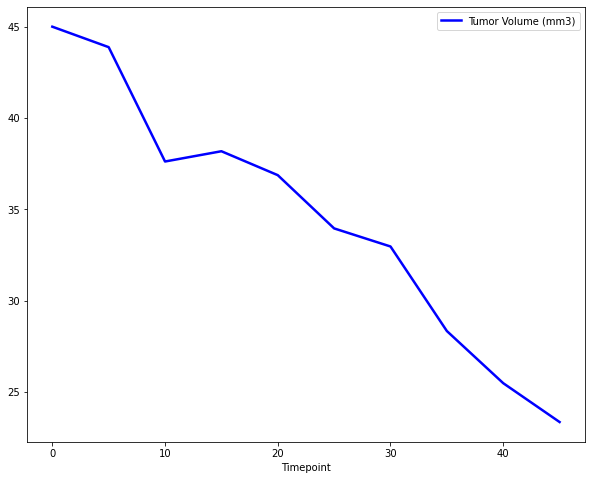

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

 #Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="blue")
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df.head() 

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [30]:
#Arrange data into 3 columns
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [31]:
 # Get the average tumor volume for each mouse under the use of Capomulin
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [33]:
#Rename "Tumor Volume (mm3)" column to "Average Volume"
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


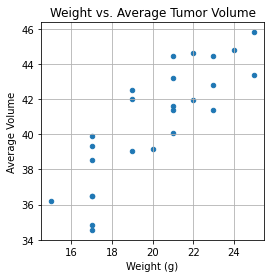

In [34]:
#Creating the scatter plot of mouse wight compared to the average tumor volume for Capomulin

avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_capo.iloc[:,0]
avg_tumor_volume = avg_capo.iloc[:,1]
# We then compute the Pearson correlation coefficient between "Mouse Weight" and "Average Tumor Volume"
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

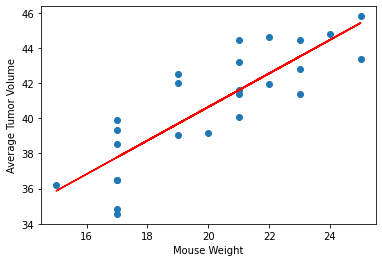

In [37]:
# import linregress
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()